In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter("ignore")

## 1. ETL (Extract, Transform, Load)

In [138]:
df = pd.read_csv('datasets/selected_2000user.csv')
df

,MeterID,DATE-Time,KWH
0,6200093839,2021-01-01 00:00:00,0.602
1,6200093839,2021-01-01 00:15:00,0.589
2,6200093839,2021-01-01 00:30:00,0.410
3,6200093839,2021-01-01 00:45:00,0.495
4,6200093839,2021-01-01 01:00:00,0.450
...,...,...,...
40181914,6200106574,2021-08-18 06:30:00,0.156
40181915,6200106574,2021-08-18 06:45:00,0.138
40181916,6200106574,2021-08-18 07:00:00,0.155
40181917,6200106574,2021-08-18 07:15:00,0.148


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181919 entries, 0 to 40181918
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   MeterID    int64  
 1   DATE-Time  object 
 2   KWH        float64
dtypes: float64(1), int64(1), object(1)
memory usage: 919.7+ MB


## 2. EDA (Exploratory Data Analysis)

In [140]:
df['MeterID'] = df['MeterID'].astype('object')

In [141]:
unique_meter_ids = df['MeterID'].unique()

In [142]:
user_ids = [str(i) for i in range(len(unique_meter_ids))]

In [143]:
user_id_dict = {meter_id: user_id for meter_id, user_id in zip(unique_meter_ids, user_ids)}

In [144]:
df["user"] = df["MeterID"].apply(lambda x: user_id_dict[x])

In [145]:
df

,MeterID,DATE-Time,KWH,user
0,6200093839,2021-01-01 00:00:00,0.602,0
1,6200093839,2021-01-01 00:15:00,0.589,0
2,6200093839,2021-01-01 00:30:00,0.410,0
3,6200093839,2021-01-01 00:45:00,0.495,0
4,6200093839,2021-01-01 01:00:00,0.450,0
...,...,...,...,...
40181914,6200106574,2021-08-18 06:30:00,0.156,411
40181915,6200106574,2021-08-18 06:45:00,0.138,411
40181916,6200106574,2021-08-18 07:00:00,0.155,411
40181917,6200106574,2021-08-18 07:15:00,0.148,411


In [146]:
user_data = df[df['user']==str(0)]

In [147]:
user_data

,MeterID,DATE-Time,KWH,user
0,6200093839,2021-01-01 00:00:00,0.602,0
1,6200093839,2021-01-01 00:15:00,0.589,0
2,6200093839,2021-01-01 00:30:00,0.410,0
3,6200093839,2021-01-01 00:45:00,0.495,0
4,6200093839,2021-01-01 01:00:00,0.450,0
...,...,...,...,...
38965661,6200093839,2021-08-31 22:45:00,0.773,0
38965662,6200093839,2021-08-31 23:00:00,0.782,0
38965663,6200093839,2021-08-31 23:15:00,0.829,0
38965664,6200093839,2021-08-31 23:30:00,0.757,0


In [148]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21048 entries, 0 to 38965665
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeterID    21048 non-null  object 
 1   DATE-Time  21048 non-null  object 
 2   KWH        21048 non-null  float64
 3   user       21048 non-null  object 
dtypes: float64(1), object(3)
memory usage: 822.2+ KB


In [149]:
user_data['DATE-Time'] = pd.to_datetime(user_data['DATE-Time'], infer_datetime_format=True)

In [150]:
user_data = user_data.set_index('DATE-Time').resample("15T").fillna(method="ffill").reset_index()

In [151]:
user_data

,DATE-Time,MeterID,KWH,user
0,2021-01-01 00:00:00,6200093839,0.602,0
1,2021-01-01 00:15:00,6200093839,0.589,0
2,2021-01-01 00:30:00,6200093839,0.410,0
3,2021-01-01 00:45:00,6200093839,0.495,0
4,2021-01-01 01:00:00,6200093839,0.450,0
...,...,...,...,...
23323,2021-08-31 22:45:00,6200093839,0.773,0
23324,2021-08-31 23:00:00,6200093839,0.782,0
23325,2021-08-31 23:15:00,6200093839,0.829,0
23326,2021-08-31 23:30:00,6200093839,0.757,0


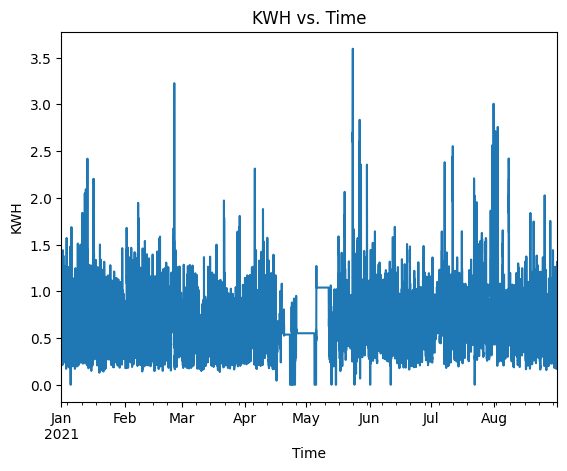

In [152]:
import matplotlib.pyplot as plt

# Set the index to the DATE-Time column
user_data = user_data.set_index('DATE-Time')

# Plot the KWH column
user_data['KWH'].plot()

# Set the plot title and axis labels
plt.title('KWH vs. Time')
plt.xlabel('Time')
plt.ylabel('KWH')

# Show the plot
plt.show()

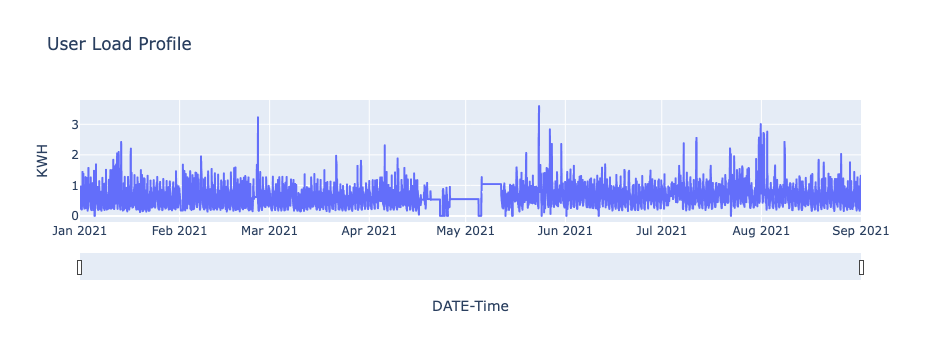

In [153]:
fig = px.line(user_data['KWH'].reset_index(), x='DATE-Time', y='KWH', title='User Load Profile')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

### 2.1 Feature Engineering

In [154]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23328 entries, 2021-01-01 00:00:00 to 2021-08-31 23:45:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MeterID  23328 non-null  object 
 1   KWH      23328 non-null  float64
 2   user     23328 non-null  object 
dtypes: float64(1), object(2)
memory usage: 729.0+ KB


In [155]:
user_data = user_data.reset_index()

In [156]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23328 entries, 0 to 23327
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE-Time  23328 non-null  datetime64[ns]
 1   MeterID    23328 non-null  object        
 2   KWH        23328 non-null  float64       
 3   user       23328 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 729.1+ KB


In [87]:
# Create a quarter column
user_data['quarter'] = (user_data['DATE-Time'].dt.hour * 4) + (user_data['DATE-Time'].dt.minute // 15).astype('object')

# Create an hour column
user_data['hour'] = user_data['DATE-Time'].dt.hour.astype('object')

# Create a weekday column
user_data['weekday'] = pd.Categorical(user_data["DATE-Time"].dt.strftime('%A'),   # '%A' represents to Weekday as locale’s full name.
                             categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                             ordered=True)

In [88]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23328 entries, 0 to 23327
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE-Time  23328 non-null  datetime64[ns]
 1   MeterID    23328 non-null  object        
 2   KWH        23328 non-null  float64       
 3   user       23328 non-null  object        
 4   quarter    23328 non-null  object        
 5   hour       23328 non-null  object        
 6   weekday    23328 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), object(4)
memory usage: 1.1+ MB


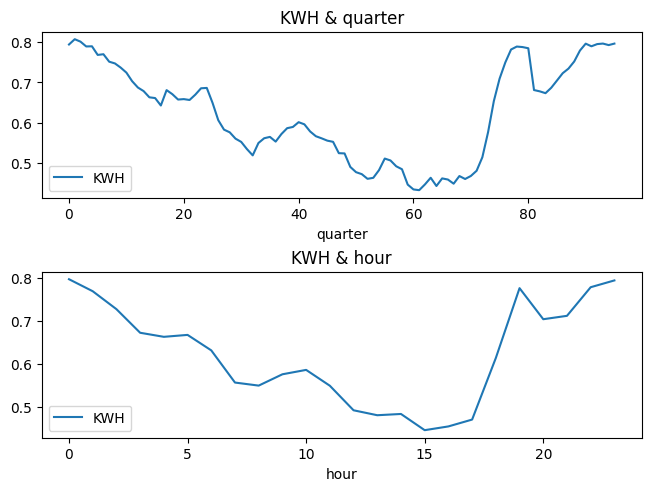

In [89]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)

user_data[['KWH', 'quarter']].groupby('quarter').mean().plot(ax=axs[0])
user_data[['KWH', 'hour']].groupby('hour').mean().plot(ax=axs[1])

axs[0].set_title('KWH & quarter')
axs[1].set_title('KWH & hour')

plt.show()

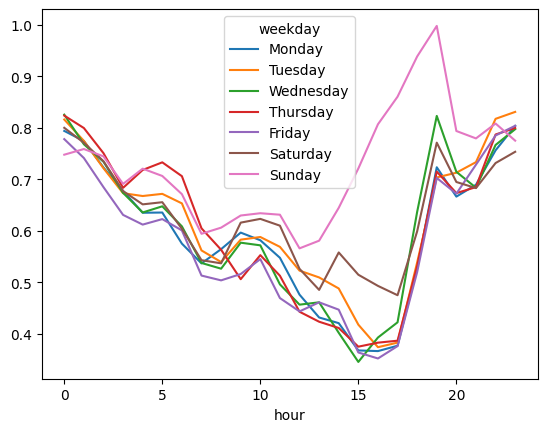

In [90]:
user_data.groupby(['hour', 'weekday']).mean()['KWH'].unstack().plot();

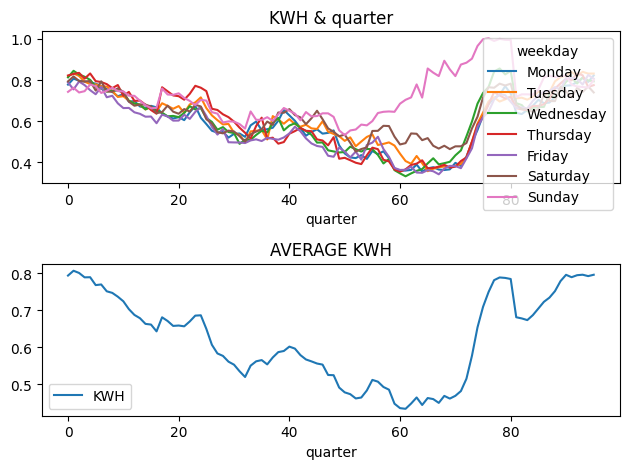

In [111]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)

user_data.groupby(['quarter', 'weekday']).mean()['KWH'].unstack().plot(ax=axs[0]);
user_data[['KWH', 'quarter']].groupby('quarter').mean().plot(ax=axs[1])
# user_data.groupby(['hour', 'weekday']).mean()['KWH'].unstack().plot(ax=axs[2]);

axs[0].set_title('KWH & quarter')
axs[1].set_title('AVERAGE KWH')

plt.tight_layout();

In [117]:
user_mean = user_data[['KWH', 'quarter']].groupby('quarter').mean()

In [121]:
user_mean.T.reset_index(drop=True)

quarter,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.793782,0.80686,0.800848,0.788947,0.789313,0.767975,0.769679,0.751206,0.746905,0.736597,...,0.72272,0.734066,0.751667,0.778778,0.795844,0.789346,0.794778,0.796082,0.792325,0.796008


In [122]:
user_mean = user_mean.T.reset_index(drop=True)

In [127]:
# Create a new DataFrame with the MeterID and user columns
new_df = user_data[['MeterID', 'user']].drop_duplicates().reset_index(drop=True)

In [129]:
new_df = new_df.join(user_mean)

In [130]:
new_df

,MeterID,user,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,6200093839,0,0.793782,0.80686,0.800848,0.788947,0.789313,0.767975,0.769679,0.751206,...,0.72272,0.734066,0.751667,0.778778,0.795844,0.789346,0.794778,0.796082,0.792325,0.796008


## 3. Create the function

In [133]:
def create_user_mean_df(df):
    # Change MeterID to object type
    df['MeterID'] = df['MeterID'].astype(str)
    
    # Create dictionary of user ids
    unique_meter_ids = df['MeterID'].unique()
    user_ids = [str(i) for i in range(len(unique_meter_ids))]
    user_id_dict = {meter_id: user_id for meter_id, user_id in zip(unique_meter_ids, user_ids)}
    
    # Create empty dataframe to store mean values
    user_mean_df = pd.DataFrame()
    
    # Iterate through each user
    for meter_id, user_id in user_id_dict.items():
        # Create dataframe for current user
        user_data = df[df['MeterID'] == meter_id].copy()
        user_data['DATE-Time'] = pd.to_datetime(user_data['DATE-Time'], infer_datetime_format=True)
        user_data = user_data.set_index('DATE-Time').resample("15T").fillna(method="ffill").reset_index()
        
        # Create quarter, hour, and weekday columns
        user_data['quarter'] = (user_data['DATE-Time'].dt.hour * 4) + (user_data['DATE-Time'].dt.minute // 15).astype('object')
        user_data['hour'] = user_data['DATE-Time'].dt.hour.astype('object')
        user_data['weekday'] = pd.Categorical(user_data["DATE-Time"].dt.strftime('%A'),
                                              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                              ordered=True)
        
        # Calculate mean values for each quarter
        user_mean = user_data[['KWH', 'quarter']].groupby('quarter').mean().T.reset_index(drop=True)
        user_mean.columns = [f"{col}_{user_id}" for col in user_mean.columns]
        
        # Add MeterID and user columns to mean dataframe
        user_mean['MeterID'] = meter_id
        user_mean['user'] = user_id
        
        # Append mean values to user_mean_df
        user_mean_df = pd.concat([user_mean_df, user_mean], axis=0)
    
    return user_mean_df


In [157]:
def create_user_mean_df(df, user_id):
    # Select the data for the specified user
    user_data = df[df['user']==str(user_id)]
    
    # Resample `15min` in order to have completed `"DATE-Time"`
    # Fill the missing value.
    user_data['DATE-Time'] = pd.to_datetime(user_data['DATE-Time'], infer_datetime_format=True)
    user_data = user_data.set_index('DATE-Time').resample("15T").fillna(method="ffill").reset_index()
    
    # Create a quarter column
    user_data['quarter'] = (user_data['DATE-Time'].dt.hour * 4) + (user_data['DATE-Time'].dt.minute // 15).astype('object')

    # Create an hour column
    user_data['hour'] = user_data['DATE-Time'].dt.hour.astype('object')

    # Create a weekday column
    user_data['weekday'] = pd.Categorical(user_data["DATE-Time"].dt.strftime('%A'),   # '%A' represents to Weekday as locale’s full name.
                             categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                             ordered=True)
    # Get the means
    user_mean = user_data[['KWH', 'quarter']].groupby('quarter').mean()
    user_mean = user_mean.T.reset_index(drop=True)
    
    # Create a new DataFrame with the MeterID and user columns
    new_df = user_data[['MeterID', 'user']].drop_duplicates().reset_index(drop=True)
    
    # Join two DataFrame
    new_df = new_df.join(user_mean)
    
    return new_df

In [158]:
df

,MeterID,DATE-Time,KWH,user
0,6200093839,2021-01-01 00:00:00,0.602,0
1,6200093839,2021-01-01 00:15:00,0.589,0
2,6200093839,2021-01-01 00:30:00,0.410,0
3,6200093839,2021-01-01 00:45:00,0.495,0
4,6200093839,2021-01-01 01:00:00,0.450,0
...,...,...,...,...
40181914,6200106574,2021-08-18 06:30:00,0.156,411
40181915,6200106574,2021-08-18 06:45:00,0.138,411
40181916,6200106574,2021-08-18 07:00:00,0.155,411
40181917,6200106574,2021-08-18 07:15:00,0.148,411


In [159]:
user_test = create_user_mean_df(df, 0)

In [160]:
user_test

,MeterID,user,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,6200093839,0,0.793782,0.80686,0.800848,0.788947,0.789313,0.767975,0.769679,0.751206,...,0.72272,0.734066,0.751667,0.778778,0.795844,0.789346,0.794778,0.796082,0.792325,0.796008


In [161]:
user_test1 = create_user_mean_df(df, 1)

In [162]:
user_test1

,MeterID,user,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,6200093048,1,0.041691,0.042938,0.04256,0.041551,0.04079,0.040354,0.040226,0.039733,...,0.059342,0.057185,0.055041,0.052202,0.048926,0.047021,0.04528,0.043815,0.043263,0.042198


## Combined together

In [163]:
df['user'].unique()

array(['0', '1', '2', ..., '1998', '1999', '2000'], dtype=object)

In [172]:
from tqdm import tqdm

# Create empty dataframe to store mean values
user_mean_df = pd.DataFrame()

for user_id in tqdm(df['user'].unique()):
    user_mean = create_user_mean_df(df, user_id)
    user_mean_df = pd.concat([user_mean_df, user_mean], axis=0)

100%|██████████| 2001/2001 [28:00<00:00,  1.19it/s]


In [173]:
user_mean_df

,MeterID,user,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,6200093839,0,0.793782,0.806860,0.800848,0.788947,0.789313,0.767975,0.769679,0.751206,...,0.722720,0.734066,0.751667,0.778778,0.795844,0.789346,0.794778,0.796082,0.792325,0.796008
0,6200093048,1,0.041691,0.042938,0.042560,0.041551,0.040790,0.040354,0.040226,0.039733,...,0.059342,0.057185,0.055041,0.052202,0.048926,0.047021,0.045280,0.043815,0.043263,0.042198
0,6200085183,2,0.114519,0.118584,0.116782,0.111737,0.112181,0.107630,0.108683,0.102934,...,0.151885,0.144255,0.135827,0.131691,0.126115,0.126082,0.124058,0.121074,0.119366,0.117086
0,6200059982,3,0.170506,0.165831,0.153872,0.142395,0.133942,0.130494,0.126901,0.127193,...,0.287523,0.279782,0.272053,0.254453,0.237963,0.229202,0.223638,0.216510,0.204082,0.184267
0,6200063890,4,0.097938,0.094436,0.096247,0.095243,0.092761,0.095033,0.092370,0.091309,...,0.101358,0.100169,0.100313,0.099770,0.096185,0.098502,0.098309,0.099757,0.097309,0.099914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,6200050860,1996,0.388585,0.399708,0.394156,0.391014,0.385222,0.376538,0.372198,0.371741,...,0.538863,0.505590,0.465703,0.451953,0.434585,0.422505,0.413858,0.403651,0.400792,0.395939
0,6200050862,1997,0.411028,0.411231,0.400396,0.385151,0.369099,0.356368,0.339241,0.323774,...,0.577495,0.568868,0.558321,0.547684,0.528708,0.505189,0.478264,0.451571,0.438967,0.429226
0,6200050858,1998,0.019802,0.020330,0.019755,0.020316,0.021354,0.021226,0.020292,0.018448,...,0.015090,0.016047,0.016585,0.017274,0.018769,0.019693,0.019604,0.019368,0.018774,0.019335
0,6200051042,1999,0.071825,0.070642,0.068693,0.068222,0.066439,0.062396,0.062038,0.062245,...,0.173613,0.149509,0.132335,0.117524,0.105542,0.095198,0.088802,0.081585,0.074769,0.074816


In [176]:
user_mean_df.to_csv('datasets/all_2000_user_means.csv', index=False)  